# Prepare Dataset for Bias Analysis

# Amazon Customer Reviews Dataset

https://s3.amazonaws.com/amazon-reviews-pds/readme.html

## Schema

- `marketplace`: 2-letter country code (in this case all "US").
- `customer_id`: Random identifier that can be used to aggregate reviews written by a single author.
- `review_id`: A unique ID for the review.
- `product_id`: The Amazon Standard Identification Number (ASIN).  `http://www.amazon.com/dp/<ASIN>` links to the product's detail page.
- `product_parent`: The parent of that ASIN.  Multiple ASINs (color or format variations of the same product) can roll up into a single parent.
- `product_title`: Title description of the product.
- `product_category`: Broad product category that can be used to group reviews (in this case digital videos).
- `star_rating`: The review's rating (1 to 5 stars).
- `helpful_votes`: Number of helpful votes for the review.
- `total_votes`: Number of total votes the review received.
- `vine`: Was the review written as part of the [Vine](https://www.amazon.com/gp/vine/help) program?
- `verified_purchase`: Was the review from a verified purchase?
- `review_headline`: The title of the review itself.
- `review_body`: The text of the review.
- `review_date`: The date the review was written.

# Checking Pre-Requisites from the Previous `01_setup/` Folder

In [ ]:
%store -r setup_instance_check_passed

In [ ]:
try:
    setup_instance_check_passed
except NameError:
    print('+++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.')
    print('+++++++++++++++++++++++++++++++')

In [ ]:
print(setup_instance_check_passed)

In [ ]:
%store -r setup_dependencies_passed

In [ ]:
try:
    setup_dependencies_passed
except NameError:
    print('+++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.')
    print('+++++++++++++++++++++++++++++++')

In [ ]:
print(setup_dependencies_passed)

In [ ]:
%store -r setup_s3_bucket_passed

In [ ]:
try:
    setup_s3_bucket_passed    
except NameError:
    print('+++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.')
    print('+++++++++++++++++++++++++++++++')

In [ ]:
print(setup_s3_bucket_passed)

In [ ]:
%store -r setup_iam_roles_passed

In [ ]:
try:
    setup_iam_roles_passed  
except NameError:
    print('+++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.') 
    print('+++++++++++++++++++++++++++++++')

In [ ]:
print(setup_iam_roles_passed)

## Check if requirements passed

In [ ]:
if not setup_instance_check_passed:
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
if not setup_dependencies_passed:
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
if not setup_s3_bucket_passed:
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
if not setup_iam_roles_passed:
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.') 
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

In [1]:
import boto3
import sagemaker
import pandas as pd

sess   = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

## Download

Let's start by retrieving a subset of the Amazon Customer Reviews dataset.

In [3]:
!aws s3 cp 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz' ./data/

download: s3://amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz to data/amazon_reviews_us_Gift_Card_v1_00.tsv.gz


In [4]:
import csv

df = pd.read_csv('./data/amazon_reviews_us_Gift_Card_v1_00.tsv.gz', 
                 delimiter='\t', 
                 quoting=csv.QUOTE_NONE,
                 compression='gzip')
df.shape

(149086, 15)

In [5]:
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24371595,R27ZP1F1CD0C3Y,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Gift Card,5,0,0,N,Y,Five Stars,Great birthday gift for a young adult.,2015-08-31
1,US,42489718,RJ7RSBCHUDNNE,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,Gift card for the greatest selection of items ...,It's an Amazon gift card and with over 9823983...,2015-08-31
2,US,861463,R1HVYBSKLQJI5S,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,5,0,0,N,Y,Five Stars,Good,2015-08-31
3,US,25283295,R2HAXF0IIYQBIR,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,1,0,0,N,Y,One Star,Fair,2015-08-31
4,US,397970,RNYLPX611NB7Q,B005ESMGV4,379368939,"Amazon.com Gift Cards, Pack of 3 (Various Desi...",Gift Card,5,0,0,N,Y,Five Stars,I can't believe how quickly Amazon can get the...,2015-08-31


Text(0, 0.5, 'Review Count')

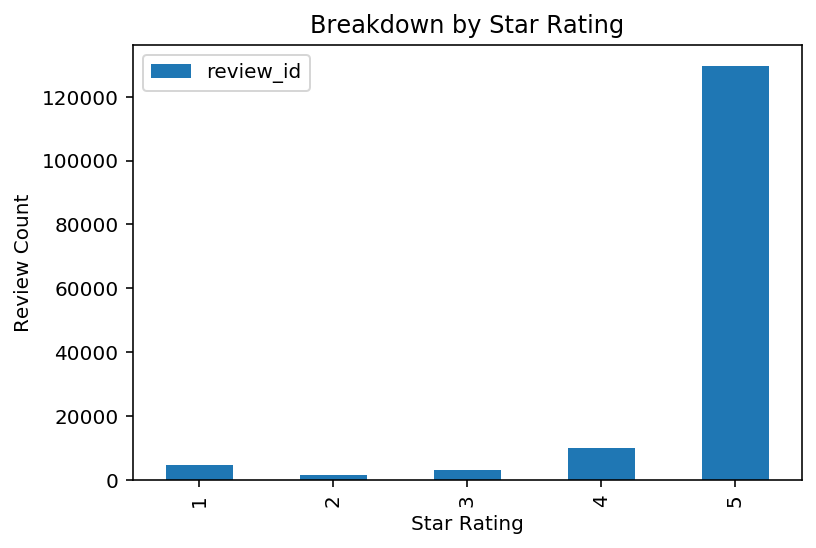

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

df[['star_rating', 'review_id']].groupby('star_rating').count().plot(kind='bar', title='Breakdown by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Review Count')

# Balance the Dataset

In [ ]:
# from sklearn.utils import resample

# five_star_df = df.query('star_rating == 5')
# four_star_df = df.query('star_rating == 4')
# three_star_df = df.query('star_rating == 3')
# two_star_df = df.query('star_rating == 2')
# one_star_df = df.query('star_rating == 1')

# # Check which sentiment has the least number of samples
# minority_count = min(five_star_df.shape[0], 
#                      four_star_df.shape[0], 
#                      three_star_df.shape[0], 
#                      two_star_df.shape[0], 
#                      one_star_df.shape[0]) 

# five_star_df = resample(five_star_df,
#                         replace = False,
#                         n_samples = minority_count,
#                         random_state = 27)

# four_star_df = resample(four_star_df,
#                         replace = False,
#                         n_samples = minority_count,
#                         random_state = 27)

# three_star_df = resample(three_star_df,
#                         replace = False,
#                         n_samples = minority_count,
#                         random_state = 27)

# two_star_df = resample(two_star_df,
#                         replace = False,
#                         n_samples = minority_count,
#                         random_state = 27)

# one_star_df = resample(one_star_df,
#                         replace = False,
#                         n_samples = minority_count,
#                         random_state = 27)

# df_balanced = pd.concat([five_star_df, four_star_df, three_star_df, two_star_df, one_star_df])
# df_balanced = df_balanced.reset_index(drop=True)

# df_balanced.shape

In [ ]:
# df_balanced[['star_rating', 'review_id']].groupby('star_rating').count().plot(kind='bar', title='Breakdown by Star Rating')
# plt.xlabel('Star Rating')
# plt.ylabel('Review Count')

In [ ]:
# df_balanced.head(5)

# Split the Data into Train, Validation, and Test Sets

In [ ]:
# from sklearn.model_selection import train_test_split

# # Split all data into 90% train and 10% holdout
# df_train, df_holdout = train_test_split(df_balanced, 
#                                         test_size=0.10,
#                                         stratify=df_balanced['star_rating'])

# # Split holdout data into 50% validation and 50% test
# df_validation, df_test = train_test_split(df_holdout,
#                                           test_size=0.50, 
#                                           stratify=df_holdout['star_rating'])


In [ ]:
# # Pie chart, where the slices will be ordered and plotted counter-clockwise:
# labels = ['Train', 'Validation', 'Test']
# sizes = [len(df_train.index), len(df_validation.index), len(df_test.index)]
# explode = (0.1, 0, 0)  

# fig1, ax1 = plt.subplots()

# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

# # Equal aspect ratio ensures that pie is drawn as a circle.
# ax1.axis('equal')  

# plt.show()

# Show 90% Train Data Split

In [ ]:
# df_train.shape

In [ ]:
# df_train[['star_rating', 'review_id']].groupby('star_rating').count().plot(kind='bar', title='90% Train Breakdown by Star Rating')

# Show 5% Validation Data Split

In [ ]:
# df_validation.shape

In [ ]:
# df_validation[['star_rating', 'review_id']].groupby('star_rating').count().plot(kind='bar', title='5% Validation Breakdown by Star Rating')

# Show 5% Test Data Split

In [ ]:
# df_test.shape

In [ ]:
# df_test[['star_rating', 'review_id']].groupby('star_rating').count().plot(kind='bar', title='5% Test Breakdown by Star Rating')

# Select `star_rating` and `review_body` for Training

In [12]:
df_train = df[['star_rating', 'review_body', 'product_category']]
df_train.shape

(149086, 3)

In [13]:
df_train.head(5)

,star_rating,review_body,product_category
0,5,Great birthday gift for a young adult.,Gift Card
1,5,It's an Amazon gift card and with over 9823983...,Gift Card
2,5,Good,Gift Card
3,1,Fair,Gift Card
4,5,I can't believe how quickly Amazon can get the...,Gift Card


# Write a Train CSV with Header for Autopilot 

In [17]:
autopilot_train_path = './amazon_reviews_us_Gift_Card_v1_00.csv'
df.to_csv(autopilot_train_path, index=False, header=True)

# Upload Train Data to S3 for Autopilot

In [18]:
train_s3_prefix = 'data'
autopilot_train_s3_uri = sess.upload_data(path=autopilot_train_path, key_prefix=train_s3_prefix)
autopilot_train_s3_uri

's3://sagemaker-us-east-1-231218423789/data/amazon_reviews_us_Gift_Card_v1_00.csv'

In [19]:
!aws s3 ls $autopilot_train_s3_uri

2021-01-07 07:55:26   40081810 amazon_reviews_us_Gift_Card_v1_00.csv


# Store Variables for Next Notebook(s)

In [ ]:
%store autopilot_train_s3_uri

In [ ]:
%store

In [ ]:
%%javascript
Jupyter.notebook.save_checkpoint();
Jupyter.notebook.session.delete();